### 데이터셋 다운로드
- http://github.com/bab2min/corpus.git

### 데이터 선택
- 네이버 쇼핑 리뷰 말뭉치
   - 라벨링 : 5,4(긍정) / 1,2(부정) -> 별도의 라벨링 작업 필요
- 스팀 리뷰 말뭉치
   - 라벨링 : 1(긍정) / 0(부정)

### 데이터 로딩
- \t으로 데이터를 구분한 데이터셋(tsv 형식)
- 컬럼데이터가 없기 때문에 read_csv에서 header=None으로 읽기

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 100)

In [15]:
reviews = pd.read_csv("./data/steam.txt", delimiter="\t", header=None)

In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       100000 non-null  int64 
 1   1       100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


### 단어빈도분석 / 단어유사도분석 / 감성분석

#### 단어빈도분석

In [19]:
text_reviews = reviews[1]
text_reviews

0                                                노래가 너무 적음
1                          돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다.
2                         막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3                     차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4                      시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
                               ...                        
99995                                         한글화해주면 10개산다
99996                                              개쌉노잼 ㅋㅋ
99997                               노잼이네요... 30분하고 지웠어요...
99998    야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.
99999                       한국의 메탈레이지를 떠오르게한다 진짜 손맛으로 하는게임
Name: 1, Length: 100000, dtype: object

In [20]:
token_list = [t for doc in text_reviews for t in doc.split(" ")]

In [10]:
token_list

['노래가',
 '너무',
 '적음',
 '돌겠네',
 '진짜.',
 '황숙아,',
 '어크',
 '공장',
 '그만',
 '돌려라.',
 '죽는다.',
 '막노동',
 '체험판',
 '막노동',
 '하는사람인데',
 '장비를',
 '내가',
 '사야돼',
 '뭐지',
 '차악!차악!!차악!!!',
 '정말',
 '이래서',
 '왕국을',
 '되찾을',
 '수',
 '있는거야??',
 '시간',
 '때우기에',
 '좋음..',
 '도전과제는',
 '50시간이면',
 '다',
 '깰',
 '수',
 '있어요',
 '역시',
 '재미있네요',
 '전작에서',
 '할수',
 '없었던',
 '자유로운',
 '덱',
 '빌딩도',
 '좋네요^^',
 '재미있었습니다.',
 '은근',
 '쉽지만',
 '은근',
 '어려운',
 '게임',
 '베ㅈ스다',
 '이',
 '개^ㅐ끼들아.',
 '시작할',
 '때',
 '체스판',
 '돌아가는거',
 '5분동안',
 '3번',
 '봤더나',
 'ㅈㄴ',
 '빡치네',
 '진짜',
 '무한로딩',
 '버그',
 '안쳐고치냐',
 '겜하지말라는거냐',
 '1시간',
 '40분동안',
 '스트레스',
 '다',
 '풀림',
 'ㄹㅇ',
 '걍',
 '겜임',
 '계정을',
 '못만들어',
 '미친겜',
 '관람객',
 'vs',
 '호랑이',
 '불가',
 '재미쩡!!!초반에',
 '좀',
 '힘들어여',
 '도트라서',
 '조아',
 '포켓볼',
 '1도',
 '몰랐는데,',
 '이걸로',
 '배워',
 '갑니다.',
 '심심할때',
 '하면',
 '좋아요.',
 '컴퓨터',
 '상대하는거',
 '제대로',
 '이겨보고',
 '싶은데',
 '잘',
 '안되네요.',
 '트레이아크',
 '사랑해요',
 '핰핰',
 '좆망겜',
 '하지마',
 '무슨',
 '처음에',
 '키자마자',
 '매칭이',
 '왜',
 '91렙하고',
 '매칭되냐',
 '뭐랄까',
 '다크소울하는느낌이에요',
 '죽으면',
 '돈',
 '다날라가는',
 '방식

In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(background_color="white", font_path="c:\Windows\Fonts\malgunsl.ttf")

In [39]:
review1 = " ".join(token_list)
stop_words = ["게임", "겜", "것", "좀"]
for word in stop_words:
    review1 = review1.replace(word,"")

In [40]:
cloud_rs = wc.generate_from_text(review1)

In [41]:
import matplotlib.pyplot as plt

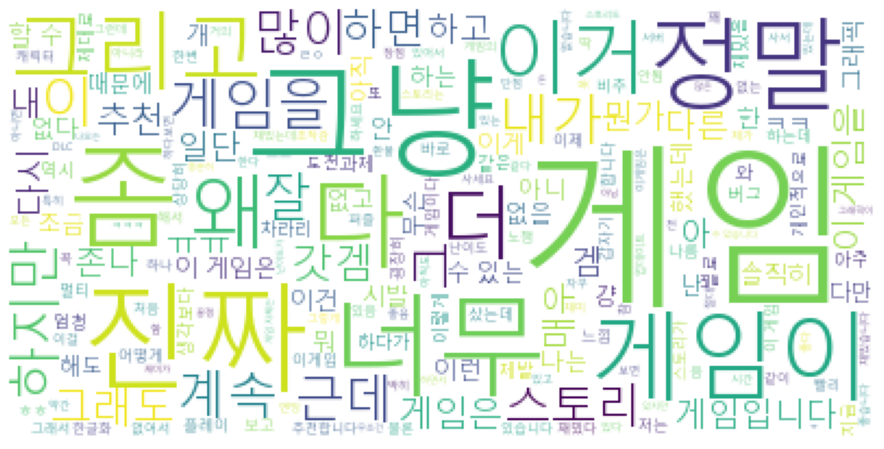

In [42]:
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off")  # x축,y축 끄기
plt.savefig("./steam_review.jpg")   # 그림저장
plt.show()

100%|███████████████████████████████████████████████████████████████████████████| 49996/49996 [08:16<00:00, 100.76it/s]


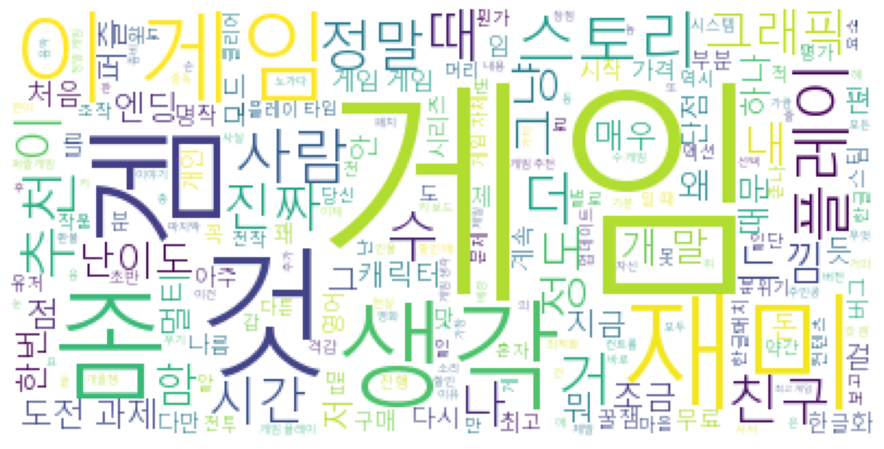

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
from tqdm import tqdm
steam_reviews = pd.read_csv("./data/steam.txt", delimiter="\t",
                           header=None)
steam_reviews.columns = ["label","review"]
steam_reviews_pos = steam_reviews[steam_reviews['label'] == 1]
steam_reviews_neg = steam_reviews[steam_reviews['label'] == 0]
okt = Okt()
steam_pos_tokens = [ t for doc in tqdm(steam_reviews_pos['review']) for t in okt.nouns(doc)]
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_pos_tokens))
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

In [ ]:
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
# 불용어 삭제
cloud_rs = wc.generate_from_text(" ".join(steam_pos_tokens))
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

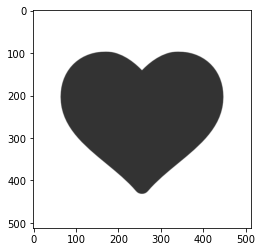

In [47]:
from PIL import Image
icon = Image.open('./data/mask.png')    # 마스크가 될 이미지 불러오기
plt.imshow(icon)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
wc = WordCloud(background_color="white", font_path="C:\Windows\Fonts\malgunbd.ttf", mask =mask )

#### 단어유사도 분석

In [11]:
from gensim.models import Word2Vec

In [46]:
steam_morphs = [okt.morphs(doc) for doc in tqdm(steam_reviews['review'])]
# tqdm 

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [20:47<00:00, 80.15it/s]


In [21]:
w2v = Word2Vec(window=5,
               min_count=5,
               sg=1,
               vector_size=100,
               sentences=[doc.split(" ") for doc in text_reviews]
              )

In [14]:
w2v.wv.get_vector("스트레스")

array([-2.20754460e-01,  1.03570610e-01,  9.34497043e-02,  5.18045062e-03,
       -3.32494676e-01, -2.38520131e-01,  4.74310726e-01,  4.64621276e-01,
       -1.15059905e-01, -1.49079323e-01, -1.89390048e-01, -5.75620770e-01,
       -9.54472944e-02,  1.29496632e-02, -1.21357061e-01, -1.46922156e-01,
       -3.24864350e-02, -1.22345582e-01,  1.29713386e-01, -2.98831522e-01,
        1.94011495e-01,  8.74514878e-02,  5.61858236e-04, -3.64151895e-02,
        1.03885688e-01,  1.10893473e-01, -2.63707072e-01, -4.99485284e-02,
       -2.46641174e-01, -1.37286127e-01,  2.49046758e-01, -1.01851866e-01,
        9.89665389e-02,  1.11751230e-02,  2.76698209e-02,  1.40805930e-01,
        2.13911742e-01, -2.82732785e-01,  9.08005834e-02, -2.81648338e-01,
        1.18976310e-01, -1.85898155e-01, -2.97706217e-01,  7.29546323e-02,
        2.60226876e-01, -2.08835289e-01, -2.58666158e-01,  1.93359613e-01,
        6.75987229e-02,  2.36302003e-01,  7.19833747e-02, -9.40602496e-02,
       -2.45971203e-01,  

In [52]:
w2v.wv.most_similar("게임")

[('겜', 0.7313883900642395),
 ('게임...', 0.712983250617981),
 ('게임..', 0.6869133710861206),
 ('게임이다.', 0.6798744201660156),
 ('게임임', 0.6759348511695862),
 ('게임,', 0.6579768657684326),
 ('겜.', 0.6576336622238159),
 ('게임입니다.', 0.6560652256011963),
 ('프로그램', 0.653331995010376),
 ('게임.', 0.6480370163917542)]

#### 감성분석

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv_test = CountVectorizer()
cv_test.fit(text_reviews)

CountVectorizer()

In [26]:
len(cv_test.vocabulary_)

242389

In [27]:
temp = ["안녕 나는 뽀로로야.",
        "오늘 점심은 뽀로로야.",
        "안녕 나는 오늘 점심에 뽀로로를 먹을꺼야.",
        "너는 오늘 나와 집에 같이 가자."]

In [28]:
cv_test.fit(temp)

CountVectorizer()

In [29]:
display(len(cv_test.vocabulary_))
display(cv_test.vocabulary_)

13

{'안녕': 8,
 '나는': 2,
 '뽀로로야': 7,
 '오늘': 9,
 '점심은': 11,
 '점심에': 10,
 '뽀로로를': 6,
 '먹을꺼야': 5,
 '너는': 4,
 '나와': 3,
 '집에': 12,
 '같이': 1,
 '가자': 0}

In [30]:
cv_test.transform(temp)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [31]:
cv_test.transform(temp).toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [44]:
text_reviews_cv = CountVectorizer()
text_reviews_cv.fit(text_reviews)
X_train = text_reviews_cv.transform(text_reviews)  # 빈도기반의 수치화
X_test = text_reviews_cv.transform(reviews[1])
y_train = reviews[0]

In [54]:
# 파이프라인 : 머신러닝 작업을 하나의 프로세스로 묶어주는 것
# ex) 결측치 -> 스케일러 -> 인코더 -> 모델
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
# 파이프라인 생성
pipeline = Pipeline([
    ('movie_tfidf', TfidfVectorizer()),
    ('movie_logi', LogisticRegression())
])
from sklearn.model_selection import GridSearchCV
grid_param = {
    "movie_tfidf__max_df" : [7000,8500,10000],
    "movie_tfidf__min_df" : [1,5,8,10],
    "movie_tfidf__ngram_range" : [(1,2),(2,2),(1,3)],
    "movie_logi__C" : [0.001,0.01,0.1,10,100,1000]
}
grid = GridSearchCV(pipeline, grid_param, cv=3, n_jobs=-1)
grid.fit(text_reviews,y_train)    # 날것의 데이터 text_train

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('movie_tfidf', TfidfVectorizer()),
                                       ('movie_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'movie_logi__C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'movie_tfidf__max_df': [7000, 8500, 10000],
                         'movie_tfidf__min_df': [1, 5, 8, 10],
                         'movie_tfidf__ngram_range': [(1, 2), (2, 2), (1, 3)]})

In [55]:
# 결과확인
print("최고점수 : ",grid.best_score_)
print("최고조합 : ",grid.best_params_)
# 최적의 파라미터로 학습된 모델
best_model = grid.best_estimator_
# 단어사전 수
print(len(best_model.steps[0][1].vocabulary_))

최고점수 :  0.7657200106530375
최고조합 :  {'movie_logi__C': 10, 'movie_tfidf__max_df': 8500, 'movie_tfidf__min_df': 1, 'movie_tfidf__ngram_range': (1, 2)}
1001658
